# Supermart Grocery Sales Analysis

#### 1. Project Description

The project analyzes sales data from a supermarket to uncover trends, insights, and customer behavior. It explores sales distribution across categories, seasonal trends, and revenue generation patterns. The findings help in improving sales strategies, inventory management, and customer targeting.


#### 2. Summary

#####  • The dataset contains details about orders, including categories, sales, and order dates.
#####  • Missing values were handled using forward fill (ffill).
#####  • Time-based trends were analyzed by extracting months and years from order dates.
#####  • Visualizations such as box plots and line charts were used to understand sales distribution and seasonality.

#### 3. Objectives

#####  • Analyze overall sales trends and revenue distribution.
#####  • Identify the best-performing product categories.
#####  • Understand seasonal variations in sales.
#####  • Provide data-driven recommendations for optimizing sales strategies.


#### Step 1: Data Loading

#####  • Imported necessary libraries (pandas, numpy, matplotlib, seaborn).


In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#####  • Loaded the dataset using pd.read_csv().
#####  • Displayed the first few rows with data.head() to understand the structure.
#####  • Checked summary statistics using data.describe().

In [432]:
# Load the dataset
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')

# Display the first few rows of the dataset
data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [434]:
# Get the summary statistics of the dataset
data.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


#### Step 2: Data Cleaning

##### • Checked for missing values using data.isnull().sum().
##### • Filled missing values using the forward-fill (ffill) method.
##### • Removed duplicate entries using data.drop_duplicates().


In [437]:
# Check for missing values
data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [439]:
# Fill missing values with appropriate strategies or drop rows
data.fillna(method='ffill', inplace=True)

# Check for duplicates
data.drop_duplicates(inplace=True)

/var/folders/4j/d949n3gj5hn9057jpr1gtm5c0000gn/T/ipykernel_45660/1567971113.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


##### • Converted the "Order Date" column to datetime format.
##### • Extracted time-based features (Month, Year) for trend analysis.

In [442]:
# Convert 'Sale Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='mixed' , errors='coerce')

# Extract month and year
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

data.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Year
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,6,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,10,2016


#### Step 3: Data Exploration & Visualization
1. Box Plot to check sales distribution by category, highlighting outliers and spread.  
2. Bar Plot to compare total sales across categories to identify top performers.
3. Sales Trends Over Time (Line Plot) to show sales patterns over time to detect seasonal trends.  
4. Histogram to analyze the distribution of numerical features to detect skewness and patterns.  
5. Top 5 Cities Bar Chart to display total sales by city, highlighting the top-performing cities.
6. Monthly Sales (Line Plot) to track sales performance month-by-month to identify trends.
7. Yearly Sales Pie Chart to show the proportion of total sales by year to assess long-term growth.  
8. Heatmap to display correlations between numerical variables to find relationships.


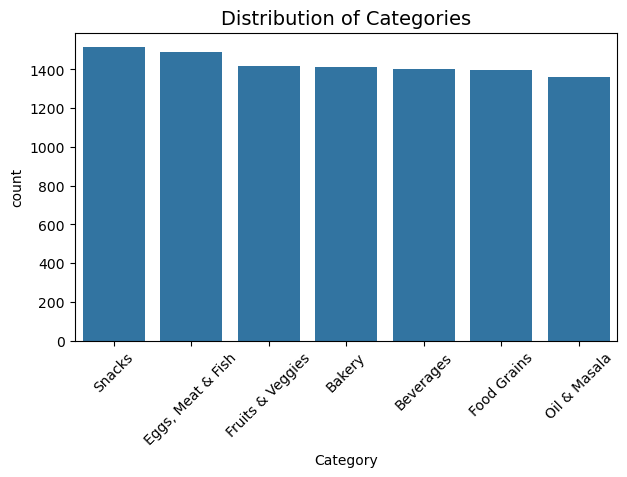

In [445]:
# Explore the distribution of categorical features
category_order= data['Category'].value_counts(ascending=False).index
plt.figure(figsize=(7, 4))
sns.countplot(x='Category', data=data, order=category_order)
plt.title('Distribution of Categories', fontsize=14)
plt.xticks(rotation=45)
plt.show()

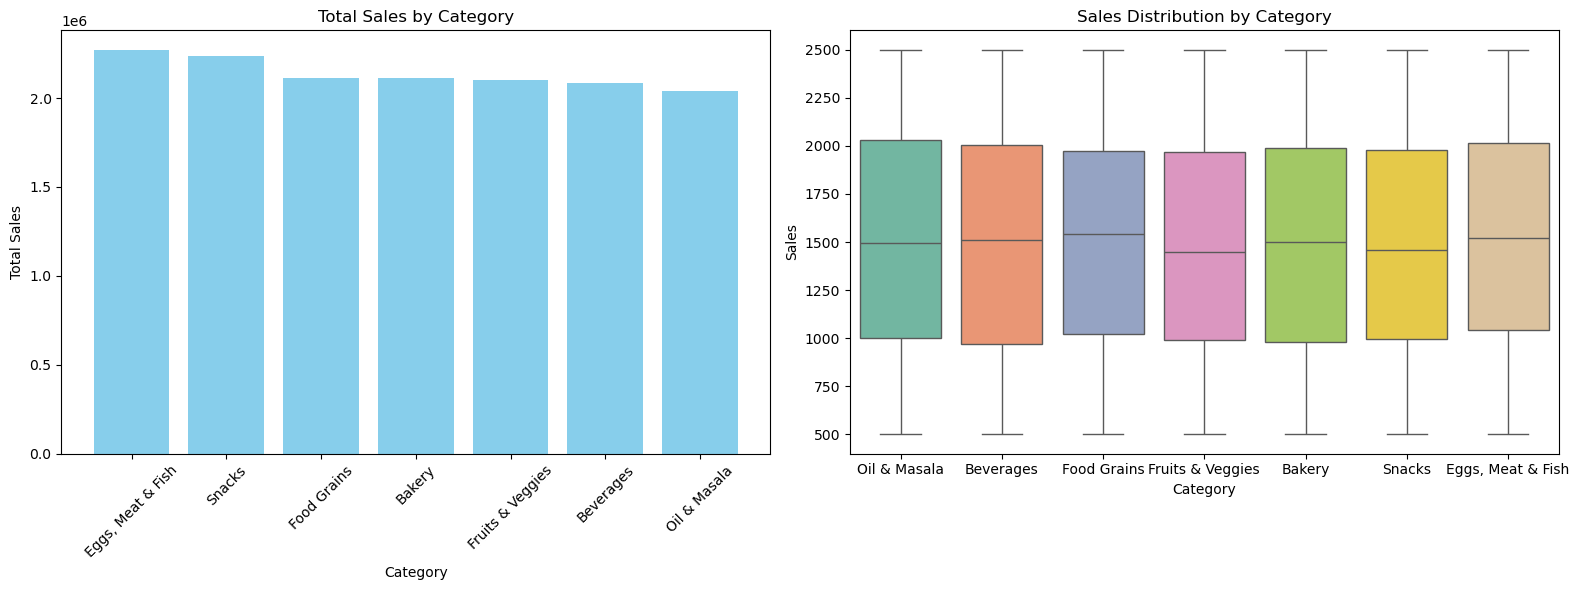

In [447]:
# Create a figure with 1 row and 2 columns of subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart: Total Sales by Category
category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
axes[0].bar(category_sales.index, category_sales.values, color='skyblue')
axes[0].set_title('Total Sales by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales')
axes[0].tick_params(axis='x', rotation=45)

# Box plot: Sales Distribution by Category
sns.boxplot(x='Category', y='Sales', data=data, ax=axes[1], hue='Category', palette='Set2')
axes[1].set_title('Sales Distribution by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Sales')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


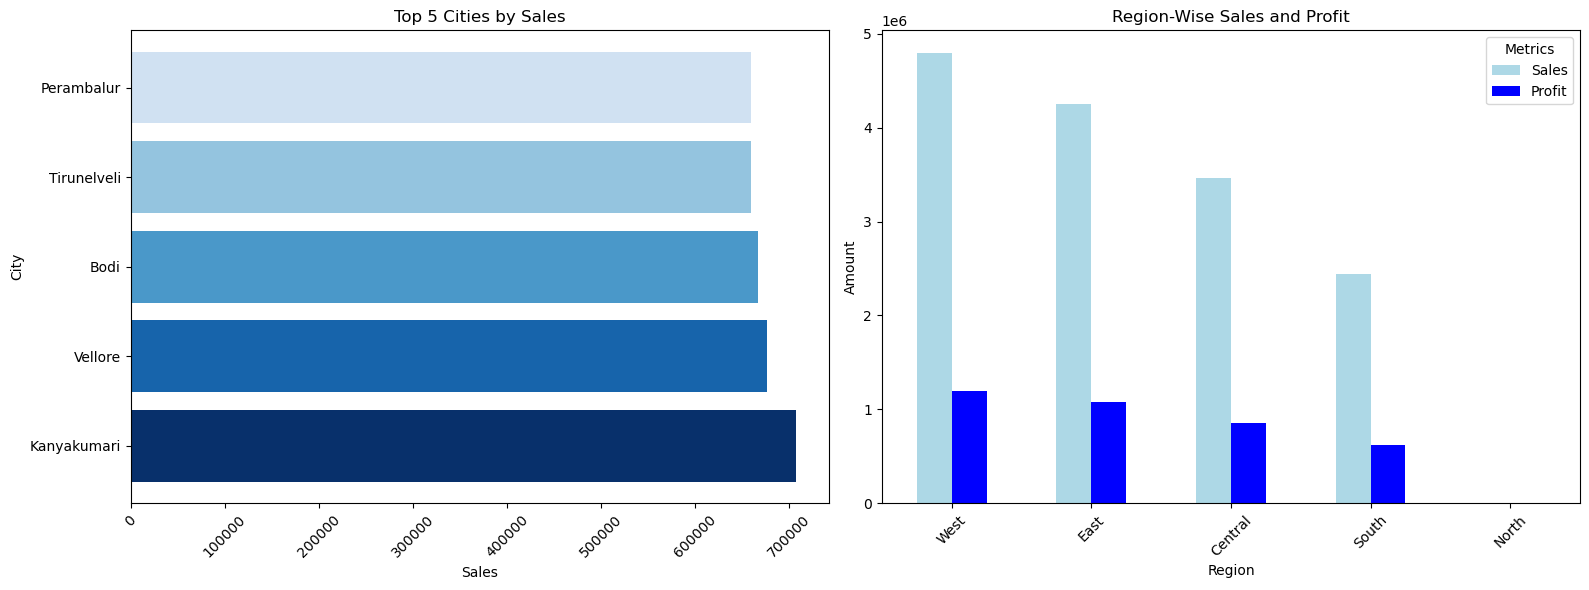

In [449]:
# Group by city and calculate total sales
city_sales = data[['City', 'Sales']]
total_sales = city_sales.groupby('City').sum().sort_values(by='Sales', ascending=False)
top_cities = total_sales.head(5)

# Group by region and calculate both Sales and Profit
region_sales_profit = data.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Top 5 Cities by Sales (horizontal bar plot)
color = plt.cm.Blues(np.linspace(1, 0.2, len(top_cities)))
axes[0].barh(top_cities.index, top_cities['Sales'], color=color)
axes[0].set_title('Top 5 Cities by Sales')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('City')
axes[0].tick_params(axis='x', rotation=45)

# Plot Region-Wise Sales and Profit
region_sales_profit.plot(kind='bar', ax=axes[1], color=['lightblue', 'blue'])
axes[1].set_title('Region-Wise Sales and Profit')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Amount')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Metrics', labels=['Sales', 'Profit'])

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


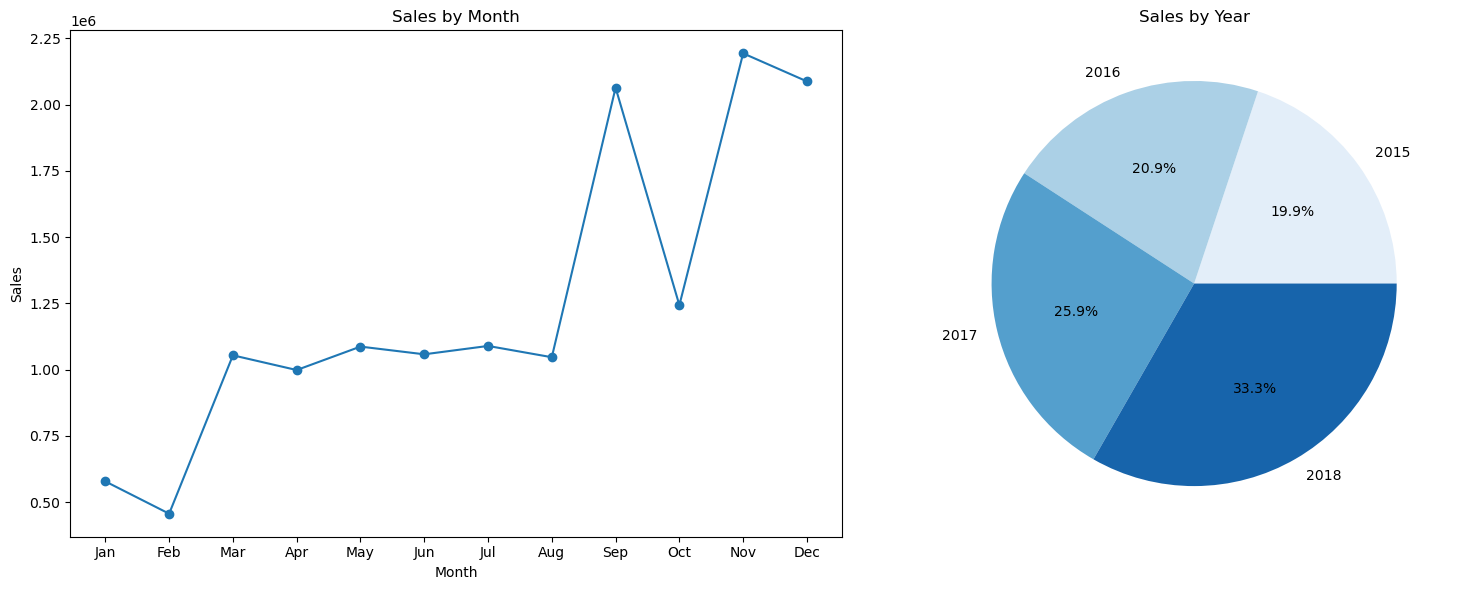

In [451]:
# Sum up sales by month
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')

# Group by Year and get total sales per year
Yearly_Sales = data.groupby("Year")["Sales"].sum()

# Create the figure with 1 row and 2 columns of subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Line chart: Sales by Month
axes[0].plot(monthly_sales_sorted['Month'], monthly_sales_sorted['Sales'], marker='o')
axes[0].set_title('Sales by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[0].set_xticks(monthly_sales_sorted['Month'])
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axes[0].grid(False)

# Pie chart: Sales by Year
color = plt.cm.Blues(np.linspace(0.1, 0.8, len(Yearly_Sales)))
axes[1].pie(Yearly_Sales, labels=Yearly_Sales.index, autopct='%1.1f%%', colors=color)
axes[1].set_title('Sales by Year')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


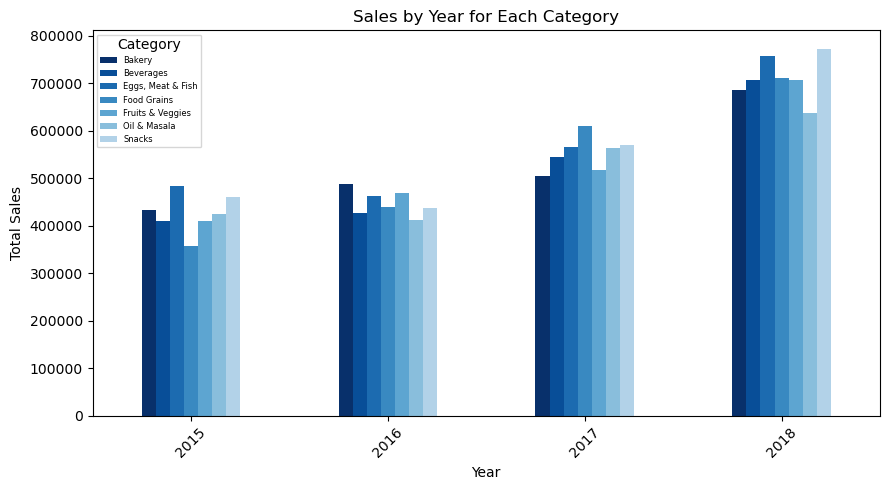

In [453]:
# Extract Year from the Order Date (if it's not already a separate column)
data['Year'] = pd.to_datetime(data['Order Date']).dt.year

# Group by Year and Category and sum the sales
sales_by_year_category = data.groupby(['Year', 'Category'])['Sales'].sum().unstack()

color = plt.cm.Blues(np.linspace(1, 0.2, len('Category')))

# Plot the data
sales_by_year_category.plot(kind='bar', figsize=(9, 5), color=color)
plt.title('Sales by Year for Each Category')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category', fontsize=6)
plt.tight_layout()
plt.show()


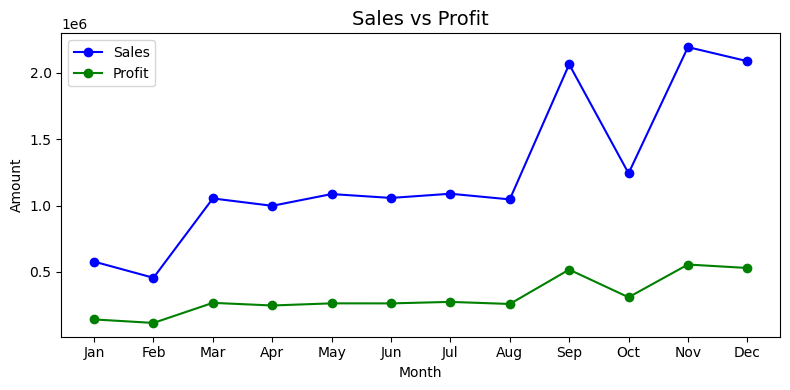

In [455]:
# Group by month (or year) and calculate total sales and profit
profit_sales_by_month = data.groupby('Month').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Create the line plot for both Sales and Profit
plt.figure(figsize=(8, 4))
plt.plot(profit_sales_by_month['Month'], profit_sales_by_month['Sales'], label='Sales', color='blue', marker='o')
plt.plot(profit_sales_by_month['Month'], profit_sales_by_month['Profit'], label='Profit', color='green', marker='o')

# Title and labels
plt.title('Sales vs Profit', fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Amount', fontsize=10)
plt.xticks(profit_sales_by_month['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Show the plot
plt.grid(False)
plt.tight_layout()
plt.show()


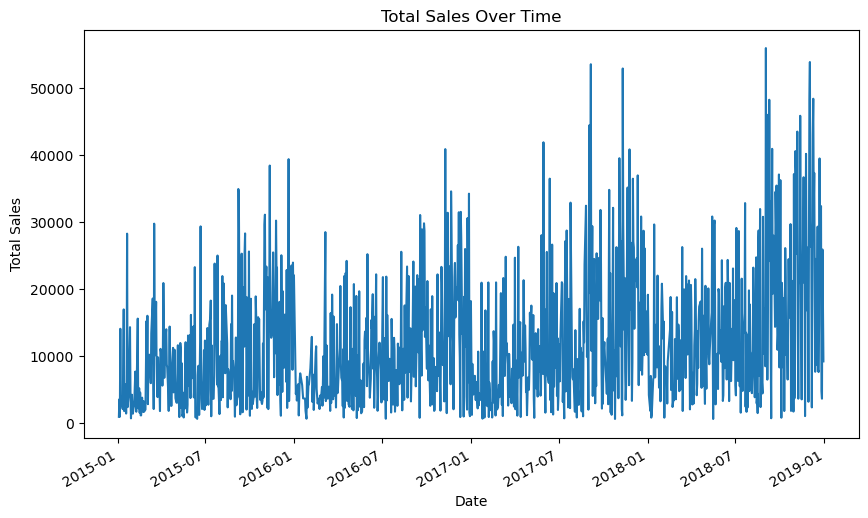

In [457]:
# Sales Trends Over Time
plt.figure(figsize=(10, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Skewness in Sales: 0.000926538463461466


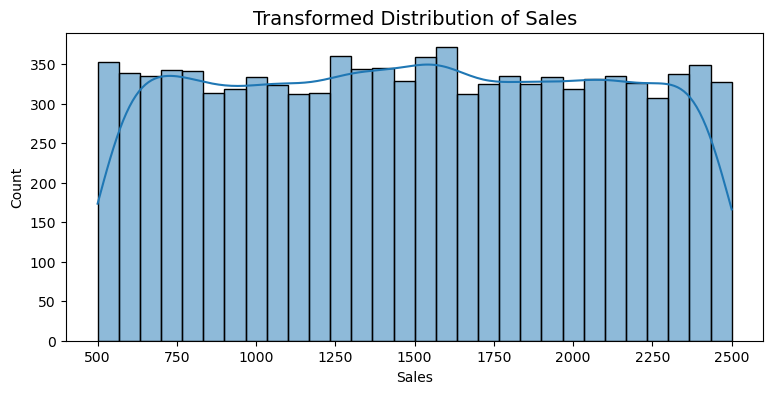

In [459]:
# Check for skewness in target variable (Sales)
sales_skewness = data['Sales'].skew()
print(f'Skewness in Sales: {sales_skewness}')

# If skewness is high, apply a log transformation
if sales_skewness > 1:
    data['Sales'] = data['Sales'].apply(lambda x: np.log(x + 1))
    print("Applied log transformation to 'Sales' due to skewness.")# Visualize the distribution of 'Sales' after transformation
plt.figure(figsize=(9, 4))
sns.histplot(data['Sales'], bins=30, kde=True)
plt.title("Transformed Distribution of Sales", fontsize=14)
plt.show()

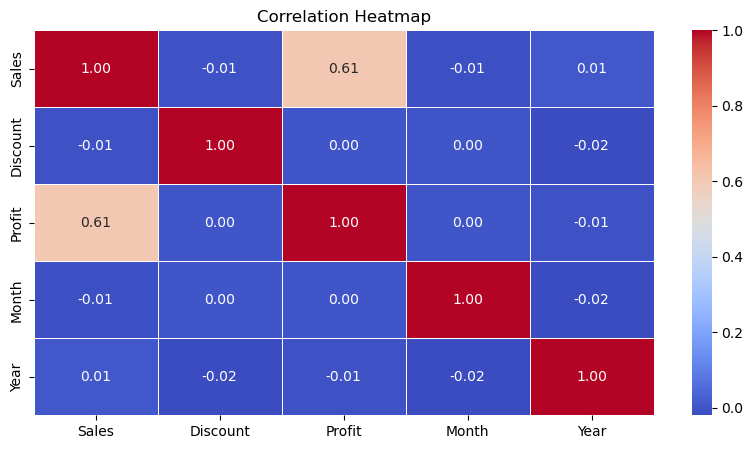

In [461]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 5))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### Step 4: Data Preprocessing & Feature Engineering

##### • Converted categorical columns (like Category, Sub Category, City, etc.) using Label Encoding.
##### • Created new features like:
1. Sales_Discount = Sales / (Discount + 1)
2. Sales_Profit = Sales / (Profit + 1)
3. Category_Region = Category * Region


In [464]:
# Initialize the label encoder
le = LabelEncoder()

# Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])

# Display the first few rows after encoding
print(data.head())


  Order ID Customer Name  Category  Sub Category  City Order Date  Region  \
0      OD1        Harish         5            14    21 2017-11-08       2   
1      OD2         Sudha         1            13     8 2017-11-08       3   
2      OD3       Hussain         3             0    13 2017-06-12       4   
3      OD4       Jackson         4            12     4 2016-10-11       3   
4      OD5       Ridhesh         3            18    12 2016-10-11       3   

   Sales  Discount  Profit  State  Month  Year  
0   1254      0.12  401.28      0     11  2017  
1    749      0.18  149.80      0     11  2017  
2   2360      0.21  165.20      0      6  2017  
3    896      0.25   89.60      0     10  2016  
4   2355      0.26  918.45      0     10  2016  


##### • Selected Relevant Features
Dropped unnecessary columns like Order ID, Customer Name, and Order Date.

##### • Feature Scaling
Used StandardScaler to normalize numerical values before model training.

In [467]:
# Create interaction features
data['Sales_Discount'] = data['Sales'] / (data['Discount'] + 1)
data['Sales_Profit'] = data['Sales'] / (data['Profit'] + 1)
data['Category_Region'] = data['Category'] * data['Region']

# Feature selection - choosing the relevant features
features = data.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
target = data['Sales']

#### Step 5: Model Building & Evaluation

##### • Split data into training & testing sets (80-20 split) using train_test_split().
##### • Used RandomForestRegressor() with 100 estimators to predict sales.
##### • Evaluated the model using:
1. Mean Squared Error (MSE)
2. R-squared (R²) Score

##### • Achieved high model accuracy (R² ≈ 0.9999) which indicates that the model performed very well.

In [470]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [472]:
# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')


Random Forest - Mean Squared Error: 25.3371747373687
Random Forest - R-squared: 0.9999231779897415


In [473]:
# Calculate Mean Squared Error and R-squared value
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')


Mean Squared Error: 25.3371747373687
R-squared: 0.9999231779897415


#### Actual vs Predicted Sales:
##### • Scatter plot to compare predictions with actual sales.
##### • A red line indicates perfect predictions, helping visualize accuracy.


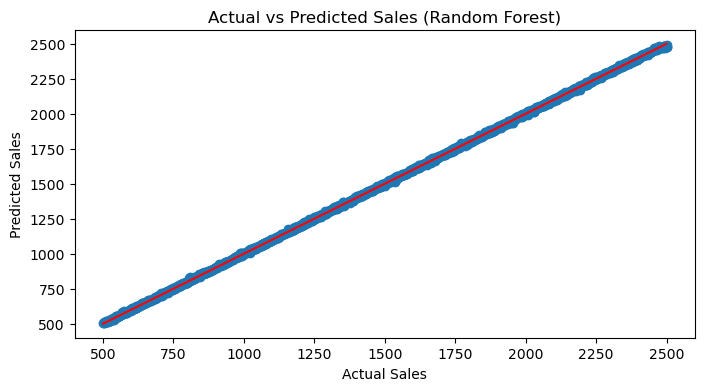

In [475]:
# Plot actual vs predicted sales
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Sales (Random Forest)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


#### Feature Importance:
##### • Extracted feature importance values from the model.
##### • Plotted a bar chart to highlight which features impact sales the most.

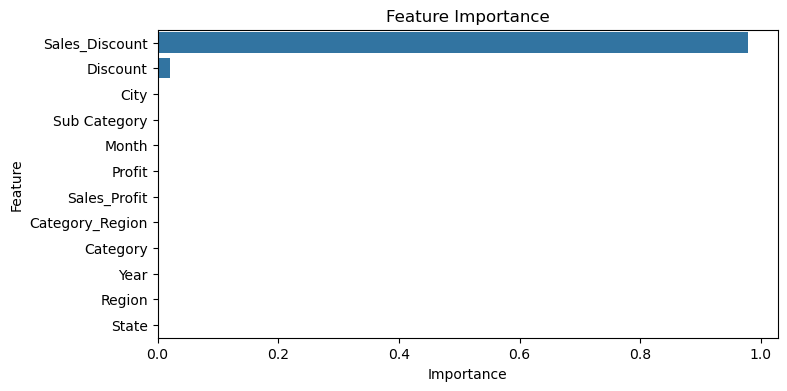

In [477]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importance values
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': importances})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


#### Insights & Findings


1. **Top-Performing Categories**:

• Eggs, Meat & Fish and Snacks are the highest revenue-generating categories, indicating a strong consumer preference for protein-rich and convenience foods.

• Oils & Masala and Household Items are the lowest-performing categories, suggesting less demand or market saturation.

2. **Seasonal Sales Patterns**:

• Sales peak during September, November, and December, likely driven by holiday shopping and festivals.

• Sales dip in January and February, possibly due to post-holiday spending fatigue and reduced consumer activity.

3. **Category Growth Trends**:

• Bakery products show consistent growth, indicating steady demand.

• Snacks experience more fluctuations, likely influenced by promotions, seasonal preferences, and changing consumer tastes.

4. **Regional Performance**:

• The East and West regions consistently show higher sales, likely due to higher population density and consumer spending power.

• The North and South regions have lower sales, suggesting potential for targeted marketing and inventory optimization.

5. **Yearly Growth**:

• Sales have been growing year-over-year, with significant spikes in September and November, indicating strong seasonal demand.

• The overall upward trend suggests a healthy market with opportunities for further growth.

6. **Monthly Sales Peaks**:

• Sales consistently peak in November and December, aligning with holiday shopping and year-end festivities.

• June and July also show moderate sales, possibly due to summer-related demand.

7. **Profitability Trends**:

• Profits are closely tied to sales, with higher profits during peak months.

• Categories like Eggs, Meat & Fish and Snacks not only generate high sales but also contribute significantly to profits.

#### Recommendations


 1. **Leverage Seasonal Peaks**:

• Focus Marketing Efforts: Increase advertising and promotional activities during high-sales months like September, November, and December to maximize revenue.

• Stock Optimization: Ensure sufficient inventory of high-demand categories (e.g., Snacks, Eggs, Meat & Fish) during peak seasons to avoid stockouts.

2. **Boost Underperforming Categories**:

• Promotions and Discounts: Introduce targeted promotions for low-performing categories like Oils & Masala and Household Items to stimulate demand.

• Bundling Strategies: Combine slow-moving items with popular products to increase their visibility and sales.

3. **Regional Focus**:

• Targeted Campaigns: Tailor marketing strategies to regions with lower sales (e.g., North and South) to boost performance.

• Localized Inventory: Adjust inventory levels based on regional preferences and demand patterns.

4. **Personalized Marketing**:

• Customer Segmentation: Analyze customer buying patterns to create personalized offers and recommendations.

• Loyalty Programs: Introduce loyalty programs to encourage repeat purchases, especially in high-performing regions.

5. **Consistent Growth for Bakery**:

• Expand Bakery Offerings: Capitalize on the consistent growth of Bakery products by introducing new items or expanding the product line.

• Quality and Freshness: Emphasize quality and freshness in marketing to maintain customer trust and loyalty.

6. **Monitor Snack Category Fluctuations**:

• Promotional Planning: Plan promotions and discounts for Snacks during low-sales periods to stabilize demand.

• Consumer Insights: Conduct surveys or focus groups to understand changing preferences and adapt offerings accordingly.

7. **Year-Round Strategies**:

• Off-Season Promotions: Introduce off-season promotions in January and February to maintain sales momentum during traditionally slow months.

• Event-Based Marketing: Align marketing campaigns with local festivals and events to drive sales throughout the year.

8. **Data-Driven Inventory Management**:

• Dynamic Stocking: Use sales data to dynamically adjust inventory levels, ensuring high-demand items are always in stock.

• Supplier Collaboration: Work closely with suppliers to ensure timely delivery of popular items during peak seasons.


#### Conclusion
 
The analysis reveals clear trends in supermarket sales, highlighting opportunities for growth and optimization. By focusing on seasonal peaks, boosting underperforming categories, and leveraging regional strengths, the supermarket can enhance its sales strategies and profitability. Personalized marketing and data-driven inventory management will further ensure sustained growth and customer satisfaction.